Разобраться с масштабами времен для режима (7/4, 2) на треугольной решетке: точно ли там уже достигнут steady state?

In [1]:
from Assemblies.game import GameField
import numpy as np
from numpy import random
import time

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
b=7/4+0.01

In [3]:
def c_density(size, percentage=21, seed=1, burnin=1000, evol=50):
    #random.seed(seed)
    instance = np.array(random.rand(size, size) > 0.01 * percentage, dtype=int)

    density = np.zeros((evol,))
    
    game = GameField(size, b)
    game.field = np.copy(instance)
    game.evolve(burnin)
    for step in range(evol):
        game.evolve(1)
        density[step] = np.count_nonzero(1 - game.field) / size**2
    return density

In [4]:
def fourier(density):
    aver=density.mean()
    four=np.fft.rfft(density-aver)
    freq=np.fft.rfftfreq(density.size)
    mask=np.abs(four)>1e-14
    freq=freq[mask]
    four=four[mask]
    fig, (ax1,ax2) = plt.subplots(2,1,figsize=(15,10))
    
    ax1.plot(density, 'o-',ms=7)
    ax1.set_xlabel('Time, step',fontsize=25)
    ax1.set_ylabel('Density',fontsize=25)
    ax1.grid(True)
    ax1.tick_params(axis='both', which='major', labelsize=22)
    
    ax2.plot(freq,np.abs(four),'o-',ms=7)
    ax2.set_xlabel('Frequency',fontsize=25)
    ax2.set_ylabel('Amplitude',fontsize=25)
    ax2.grid(True)
    
    ax2.tick_params(axis='both', which='major', labelsize=22)
    plt.show()
    print(np.abs(four))

## percentage = 21

### size = 15

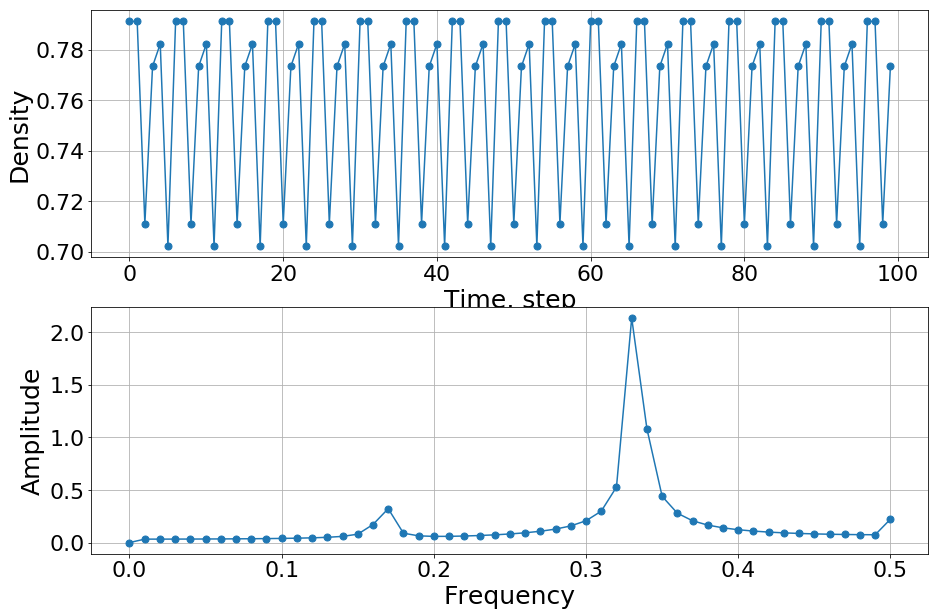

[3.44169138e-14 3.26441049e-02 3.28000418e-02 3.30647501e-02
 3.34459998e-02 3.39559065e-02 3.46125468e-02 3.54427632e-02
 3.64871617e-02 3.78094549e-02 3.95150981e-02 4.17916917e-02
 4.50064855e-02 4.99779197e-02 5.89039093e-02 7.97982187e-02
 1.71603653e-01 3.22599805e-01 8.91862331e-02 6.40668375e-02
 5.88467208e-02 5.93012234e-02 6.23235704e-02 6.70980593e-02
 7.35426193e-02 8.19515063e-02 9.29661991e-02 1.07728659e-01
 1.28291898e-01 1.58639031e-01 2.07558503e-01 2.98926962e-01
 5.28277094e-01 2.13761150e+00 1.08311510e+00 4.39851199e-01
 2.79629988e-01 2.07272378e-01 1.66329215e-01 1.40202504e-01
 1.22257679e-01 1.09326439e-01 9.97077854e-02 9.24099917e-02
 8.68191904e-02 8.25386759e-02 7.93046606e-02 7.69394382e-02
 7.53242451e-02 7.43832194e-02 2.22222222e-01]


In [66]:
density2115=c_density(size=15, percentage=21, burnin=2000, evol=100)
fourier(density2115)

steady state достигается за <2000 шагов. В ~ 7 из 10 случаев плотность кооператоров на нуле. В остальных случаях наблюдается сложный период.

### size = 33

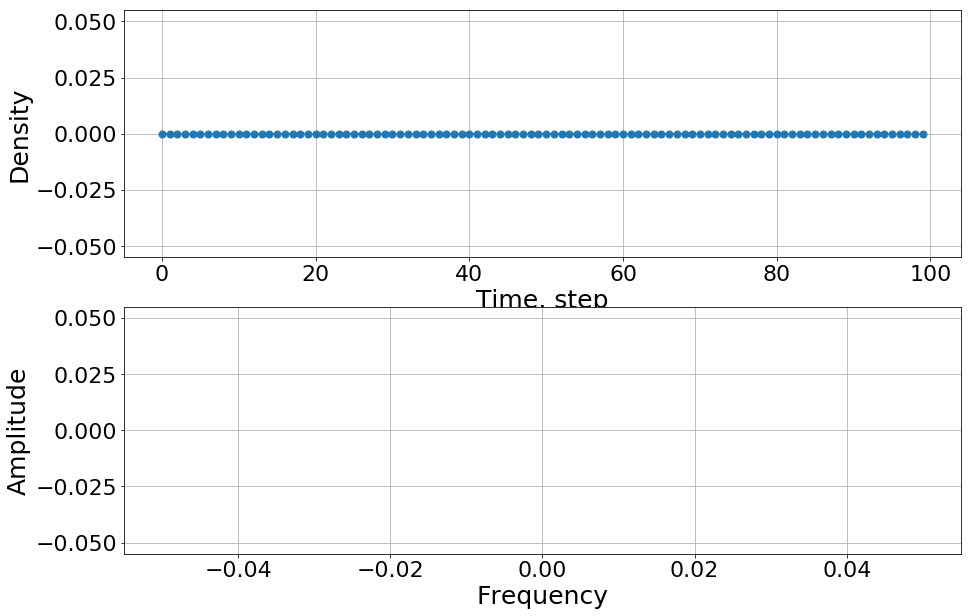

[]


In [71]:
density2133=c_density(size=33, percentage=21, burnin=10000, evol=100)
fourier(density2133)

steady state достигается за <10 000 шагов. Был замечены: сложные, простые колебания, нулевая плотность.

### size = 72

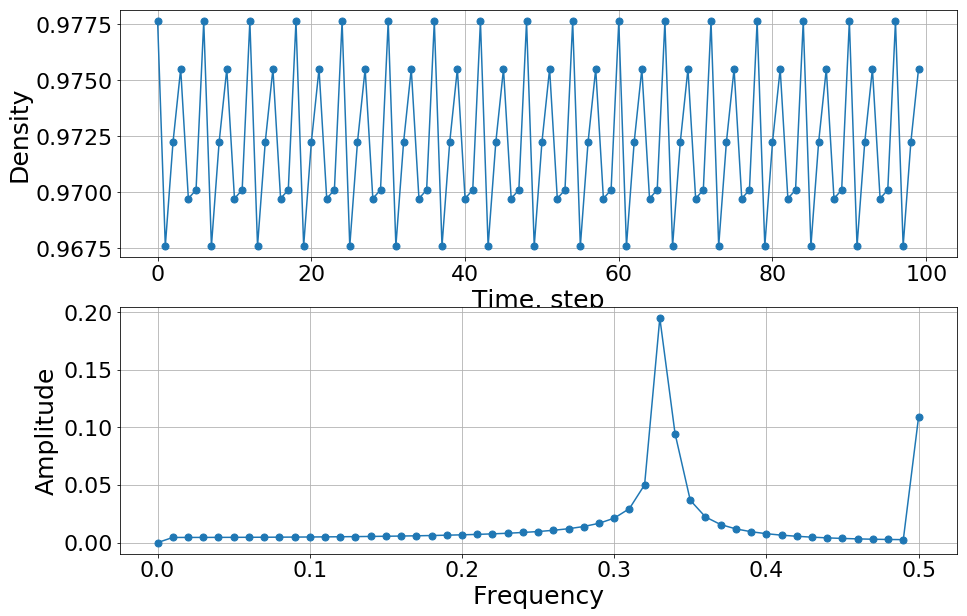

[1.60982339e-14 4.44045835e-03 4.45168651e-03 4.47052872e-03
 4.49718156e-03 4.53192773e-03 4.57514401e-03 4.62731219e-03
 4.68903363e-03 4.76104827e-03 4.84425927e-03 4.93976500e-03
 5.04890055e-03 5.17329206e-03 5.31492836e-03 5.47625650e-03
 5.66031072e-03 5.87088906e-03 6.11279954e-03 6.39220958e-03
 6.71715298e-03 7.09828373e-03 7.55002929e-03 8.09241374e-03
 8.75405316e-03 9.57730832e-03 1.06276534e-02 1.20119214e-02
 1.39170763e-02 1.67026720e-02 2.11597402e-02 2.94353965e-02
 5.01181895e-02 1.94859823e-01 9.45986867e-02 3.66950549e-02
 2.22107084e-02 1.56203780e-02 1.18493992e-02 9.40568428e-03
 7.69298188e-03 6.42688054e-03 5.45521811e-03 4.69008716e-03
 4.07823944e-03 3.58687479e-03 3.19629396e-03 2.89578154e-03
 2.68090212e-03 2.55117608e-03 1.08603395e-01]


In [10]:
density2172=c_density(size=72, percentage=21, burnin=10000, evol=100)
fourier(density2172)

steady state достигается за <10 000 шагов. Сложные колебания.

## percentage = 50

### size=15

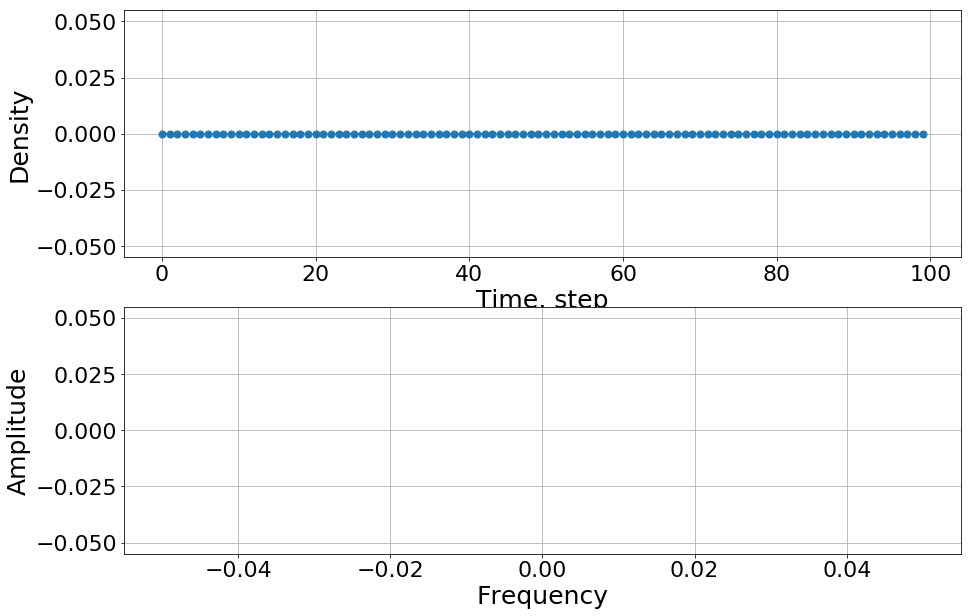

[]


In [133]:
density5015=c_density(size=15, percentage=50, burnin=2000, evol=100)
fourier(density5015)

steady state достигается за <2000 шагов. Сложные колебания либо нулевая плотность.

### size = 33

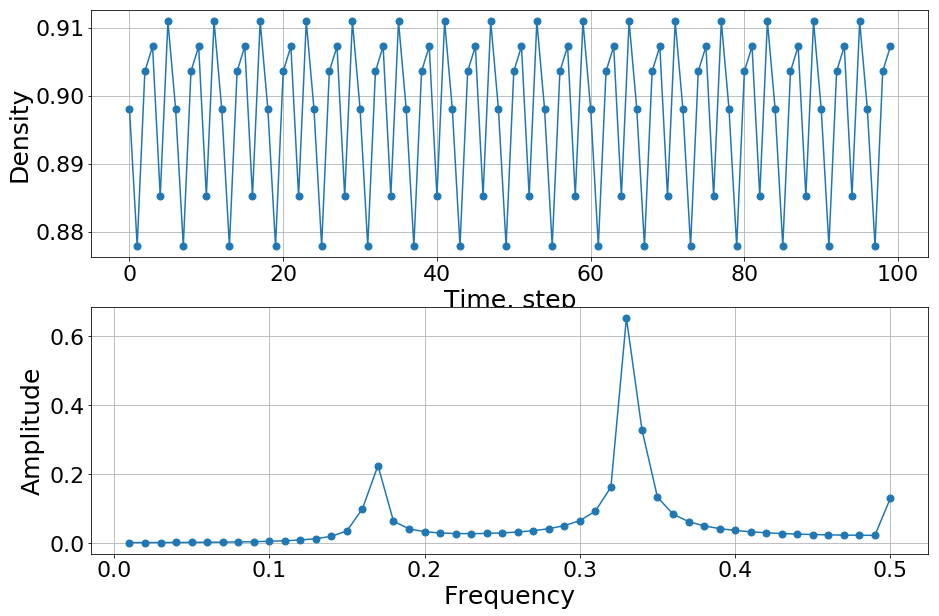

[0.00185759 0.00192187 0.00203302 0.00219768 0.00242649 0.0027357
 0.00314996 0.00370698 0.00446602 0.00552397 0.00704861 0.00935487
 0.01310599 0.01996785 0.03561987 0.09986669 0.22526948 0.06387504
 0.04163498 0.03344357 0.02971115 0.02808007 0.02773144 0.02835907
 0.02989682 0.03244674 0.03629752 0.04203556 0.05084823 0.06539638
 0.09294803 0.16262982 0.65324324 0.32927605 0.1332554  0.08453981
 0.06260317 0.05023108 0.04236325 0.03697783 0.03310987 0.03024172
 0.02807184 0.02641376 0.02514712 0.02419195 0.02349445 0.02301868
 0.02274171 0.13039486]


In [147]:
density5033=c_density(size=33, percentage=50, burnin=5000, evol=100)
fourier(density5033)

steady state достигается за <5000 шагов. Сложный/простой периоды либо нулевая плотность.

### size = 72

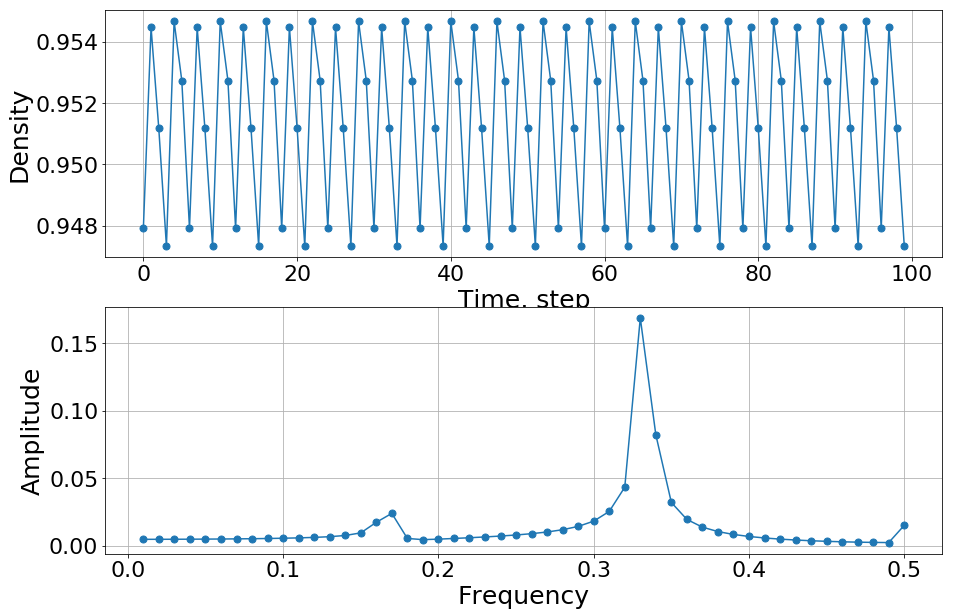

[0.00463575 0.00465428 0.00468574 0.00473104 0.0047916  0.00486951
 0.00496784 0.00509114 0.00524635 0.0054446  0.0057049  0.00606276
 0.00659343 0.00748896 0.00942178 0.01726446 0.02389751 0.00528377
 0.00440427 0.00476837 0.00527292 0.00581326 0.00640074 0.00706683
 0.00785466 0.00882582 0.01007645 0.01177125 0.01422407 0.01812282
 0.02533216 0.04330765 0.16896309 0.08226757 0.03199111 0.01940393
 0.01366999 0.0103843  0.0082516  0.00675419 0.0056451  0.00479219
 0.00411909 0.0035796  0.00314527 0.00279914 0.00253215 0.00234079
 0.00222503 0.0150463 ]


In [37]:
density5072=c_density(size=72, percentage=50, burnin=5000, evol=100)
fourier(density5072)

steady state достигается за <5000 шагов. Сложный период.

## percentage = 70

### size = 15

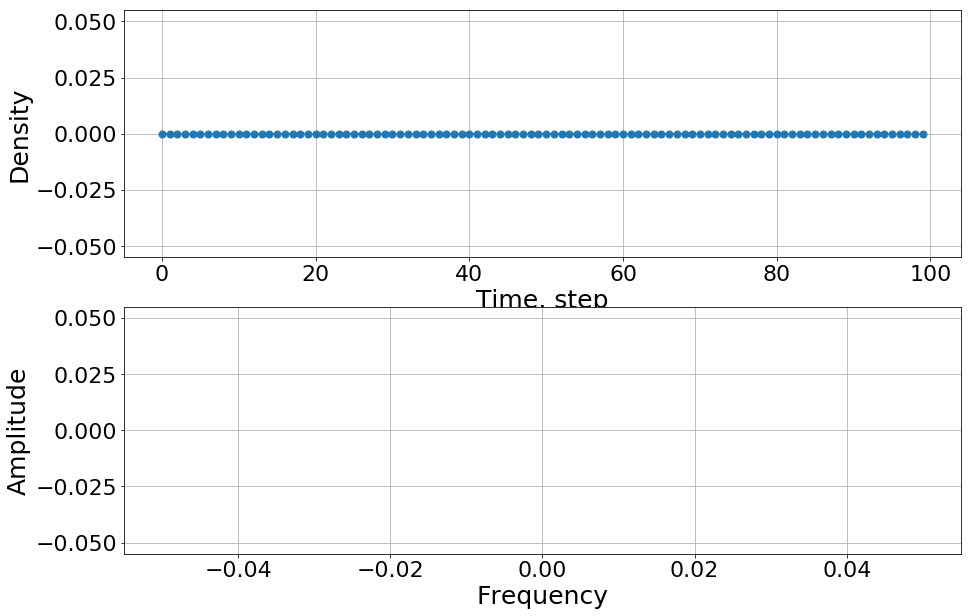

[]


In [87]:
density7015=c_density(size=15, percentage=70, burnin=2000, evol=100)
fourier(density7015)

steady state достигается за <2000 шагов. В разных опытах наблюдаются сложный, простой периоды либо нулевая плотность.

### size = 33

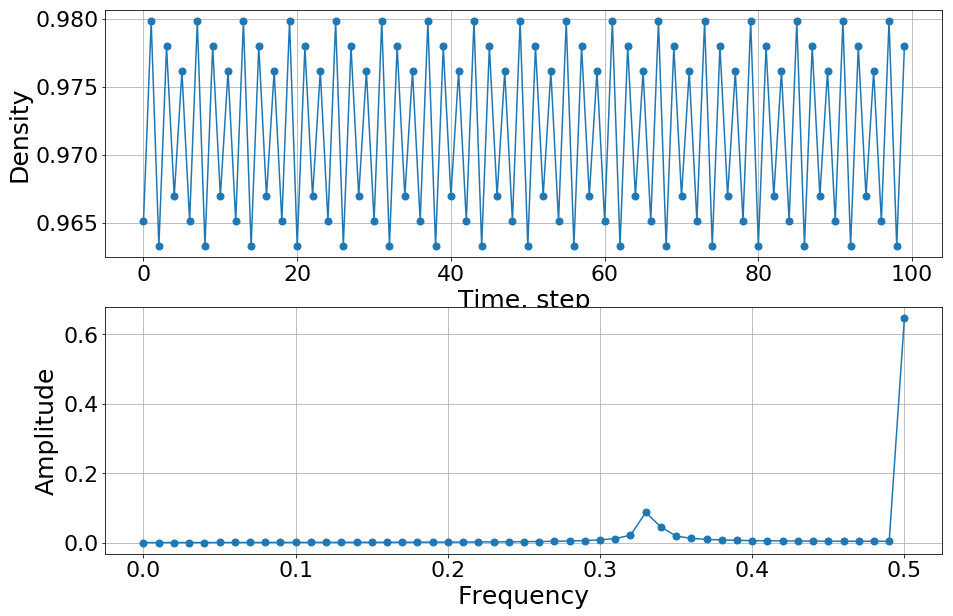

[1.11022302e-14 3.85088887e-05 7.72847814e-05 1.16599780e-04
 1.56736381e-04 1.97993179e-04 2.40691219e-04 2.85181281e-04
 3.31852446e-04 3.81142391e-04 4.33550005e-04 4.89651102e-04
 5.50118315e-04 6.15746625e-04 6.87486647e-04 7.66488625e-04
 8.54161535e-04 9.52253766e-04 1.06296529e-03 1.18910668e-03
 1.33432971e-03 1.50347001e-03 1.70307117e-03 1.94221329e-03
 2.23387404e-03 2.59727009e-03 3.06211420e-03 3.67690592e-03
 4.52654967e-03 5.77436790e-03 7.77973917e-03 1.15182365e-02
 2.08923924e-02 8.66362602e-02 4.49210894e-02 1.86406666e-02
 1.20921949e-02 9.13316827e-03 7.45769630e-03 6.38775392e-03
 5.65231136e-03 5.12193359e-03 4.72712518e-03 4.42736540e-03
 4.19757025e-03 4.02152786e-03 3.88845720e-03 3.79109468e-03
 3.72458551e-03 3.68582841e-03 6.46464646e-01]


In [119]:
density7033=c_density(size=33, percentage=70, burnin=5000, evol=100)
fourier(density7033)

steady state достигается за <5000 шагов. Наблюдаются простой, сложный периоды, а также отсутствие колебаний (с ненулевой плотностью).

### size = 72 

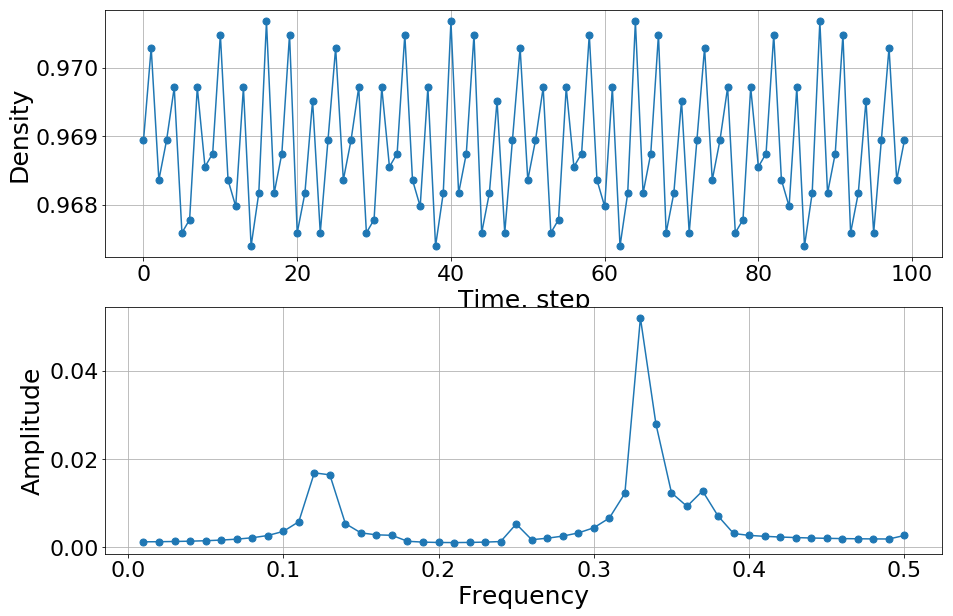

[0.00126256 0.00128932 0.00133627 0.00140745 0.00150983 0.00165531
 0.00186508 0.00217978 0.00268723 0.00361687 0.00581223 0.01687539
 0.0164281  0.00539166 0.00328372 0.00284578 0.00273373 0.00138239
 0.00119483 0.00111258 0.00109226 0.00112211 0.00119803 0.00132097
 0.00529689 0.001741   0.00207811 0.00255713 0.003274   0.00444277
 0.00664916 0.01224825 0.05195154 0.02791476 0.01235447 0.00929808
 0.01278156 0.0071083  0.00314561 0.00271939 0.00250513 0.00234787
 0.00222485 0.00212778 0.00205172 0.00199324 0.00194993 0.0019201
 0.00190262 0.00270062]


In [133]:
density7072=c_density(size=72, percentage=70, burnin=5000, evol=100)
fourier(density7072)

steady state достигается за <5000 шагов. Простой и сложный период.